In [1]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

### IMPORT SCRAPED REVIEW-LEVEL DATA FROM POSTGRESQL

In [2]:
engine = create_engine('postgresql://sashakapralov@localhost:5432/hotels')

In [3]:
df = pd.read_sql_query('select * from "reviews"',con=engine)

In [4]:
df.shape

(100008, 8)

In [5]:
df.head()

,review_id,name,title,content,recency,staysum,stars,reviewer_loc
0,1,"{""The Iroquois New York""}",An old Hotel with a slghtly modern touch.,"{""\nThis being an anniversary,we decided to vi...","April 7, 2017","{""Stayed March 2017, traveled as a couple""}",4 of 5 bubbles,"{""\nBridgetown, Barbados\n""}"
1,2,"{""The Iroquois New York""}",A fantastic stay,"{""\nForget the hotels in Times Square this one...","April 6, 2017","{""Stayed March 2017, traveled as a couple""}",5 of 5 bubbles,"{""\nHouston, Texas\n""}"
2,3,"{""The Iroquois New York""}",A very fine place to stay in New York.,"{""\nThe friendly service we received from ever...","April 6, 2017","{""Stayed March 2017, traveled as a couple""}",4 of 5 bubbles,"{""\nSolana Beach, California\n""}"
3,4,"{""The Iroquois New York""}",Great Stay!,"{""\nA fantastic mid-town location, decent rate...","April 6, 2017","{""Stayed March 2017, traveled as a couple""}",4 of 5 bubbles,"{""\nMinneapolis, Minnesota, United States\n""}"
4,5,"{""The Iroquois New York""}",Excellent,"{""\nThe Iroquois is our favorite we had wonder...","April 5, 2017","{""Stayed March 2017, traveled as a couple""}",5 of 5 bubbles,"{""\nLewes\n""}"


In [6]:
df_test = df.copy()

In [7]:
df_test.head()

,review_id,name,title,content,recency,staysum,stars,reviewer_loc
0,1,"{""The Iroquois New York""}",An old Hotel with a slghtly modern touch.,"{""\nThis being an anniversary,we decided to vi...","April 7, 2017","{""Stayed March 2017, traveled as a couple""}",4 of 5 bubbles,"{""\nBridgetown, Barbados\n""}"
1,2,"{""The Iroquois New York""}",A fantastic stay,"{""\nForget the hotels in Times Square this one...","April 6, 2017","{""Stayed March 2017, traveled as a couple""}",5 of 5 bubbles,"{""\nHouston, Texas\n""}"
2,3,"{""The Iroquois New York""}",A very fine place to stay in New York.,"{""\nThe friendly service we received from ever...","April 6, 2017","{""Stayed March 2017, traveled as a couple""}",4 of 5 bubbles,"{""\nSolana Beach, California\n""}"
3,4,"{""The Iroquois New York""}",Great Stay!,"{""\nA fantastic mid-town location, decent rate...","April 6, 2017","{""Stayed March 2017, traveled as a couple""}",4 of 5 bubbles,"{""\nMinneapolis, Minnesota, United States\n""}"
4,5,"{""The Iroquois New York""}",Excellent,"{""\nThe Iroquois is our favorite we had wonder...","April 5, 2017","{""Stayed March 2017, traveled as a couple""}",5 of 5 bubbles,"{""\nLewes\n""}"


In [8]:
df_test.isnull().sum()

review_id       0
name            0
title           0
content         0
recency         0
staysum         0
stars           0
reviewer_loc    0
dtype: int64

In [9]:
#remove rows with either missing content or missing stay summary
df_test = df_test[(df_test.staysum != '{}') & (df_test.content != '{}')]

In [10]:
df_test.shape

(98613, 8)

### NAME OF HOTEL

In [11]:
df_test.name.unique().size

444

In [12]:
df.name.unique().size

444

In [13]:
df_test['name'] = df_test.name.apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [14]:
df_test.groupby(df_test.name).size().sort_values(ascending=False)

name
The Iroquois New York                               331
Crosby Street Hotel                                 330
414 Hotel                                           329
The Sherry-Netherland Hotel                         329
The St. Regis New York                              328
Hotel Giraffe by Library Hotel Collection           328
The Broome                                          327
Casablanca Hotel by Library Hotel Collection        327
NobleDEN Hotel                                      326
The French Quarters Guest Apartments                325
Langham Place, New York, Fifth Avenue               325
The Mark                                            324
The Roxy Hotel Tribeca                              323
Hotel Elysee by Library Hotel Collection            323
The Towers at Lotte New York Palace                 323
EVEN Hotel Times Square South                       323
The Pearl Hotel                                     323
Library Hotel by Library Hotel Collection  

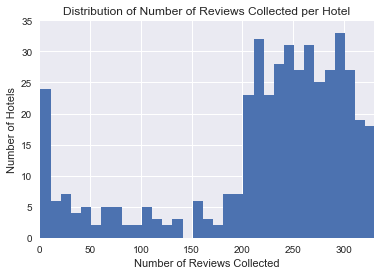

In [15]:
df_test.groupby(df_test.name).size().sort_values(ascending=False).hist(bins=33);
plt.title("Distribution of Number of Reviews Collected per Hotel")
plt.ylabel("Number of Hotels");
plt.xlabel("Number of Reviews Collected")
plt.xlim(0,330)
plt.ylim(0,35)
plt.show()

In [20]:
review_cts_df = pd.DataFrame(df_test.groupby(df_test.name).size().sort_values(ascending=False).rename("reviews_collected"))

In [21]:
review_cts_df.reset_index(inplace=True)

In [22]:
df_hotel = pd.read_pickle('df_446.pickle')

In [23]:
df_hotel.shape

(446, 101)

In [24]:
review_cts_df.columns

Index([u'name', u'reviews_collected'], dtype='object')

In [25]:
df_hotel = df_hotel.merge(review_cts_df,how='left',on='name')

In [26]:
df_hotel.shape

(446, 102)

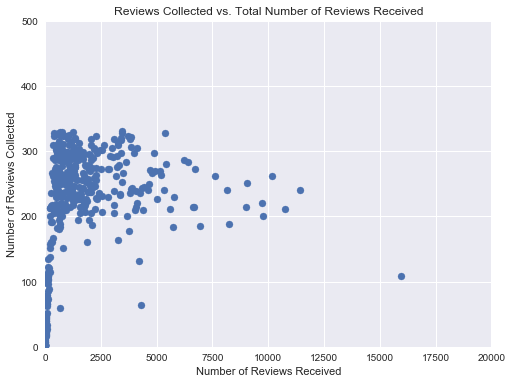

In [27]:
plt.figure(figsize = (8,6))
plt.scatter(df_hotel.n_reviews, df_hotel.reviews_collected)
plt.title("Reviews Collected vs. Total Number of Reviews Received")
plt.ylabel("Number of Reviews Collected");
plt.xlabel("Number of Reviews Received")
plt.xlim(0,20000)
plt.ylim(0,500)
plt.show()

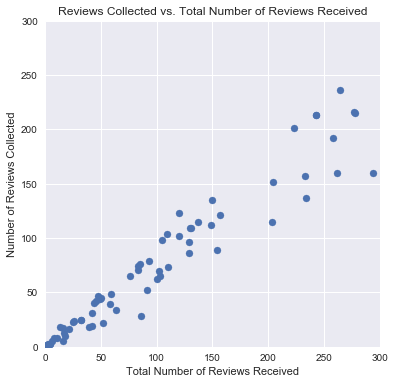

In [28]:
plt.figure(figsize = (6,6))
plt.scatter(df_hotel.n_reviews, df_hotel.reviews_collected)
plt.title("Reviews Collected vs. Total Number of Reviews Received")
plt.ylabel("Number of Reviews Collected");
plt.xlabel("Total Number of Reviews Received")
plt.xlim(0,300)
plt.ylim(0,300)
plt.show()

In [29]:
df_hotel['avg_engl_rating'] = (df_hotel.excellent_ct * 5 + df_hotel.verygood_ct * 4 + df_hotel.average_ct * 3 + \
                              df_hotel.poor_ct * 2 + df_hotel.terrible_ct * 1) / \
                            (df_hotel.excellent_ct + df_hotel.verygood_ct + df_hotel.average_ct + df_hotel.poor_ct + df_hotel.terrible_ct)

In [30]:
df_hotel.avg_engl_rating.describe()

count    446.000000
mean       4.059353
std        0.606651
min        1.538462
25%        3.854854
50%        4.201981
75%        4.438872
max        5.000000
Name: avg_engl_rating, dtype: float64

#### Date of review

In [31]:
#remove bad characters
df_test['recency'] = df_test['recency'].apply(lambda x: x.replace("\n",""))

In [32]:
#remove 'Reviewed ' language when it appears in column
df_test['recency'] = df_test['recency'].apply(lambda x: x.replace("Reviewed ",""))

In [33]:
#convert review date values to datetime
df_test['recency'] = pd.to_datetime(df_test.recency)

In [34]:
df_test.recency.unique()

array(['2017-04-07T00:00:00.000000000', '2017-04-06T00:00:00.000000000',
       '2017-04-05T00:00:00.000000000', ...,
       '2010-01-28T00:00:00.000000000', '2010-01-27T00:00:00.000000000',
       '2010-01-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [35]:
df_test.recency.describe()

count                   98613
unique                   2843
top       2017-03-13 00:00:00
freq                      485
first     2003-04-14 00:00:00
last      2017-04-10 00:00:00
Name: recency, dtype: object

#### Number of bubbles/stars

In [36]:
#keep just the first part of column value
df_test['stars'] = df_test.stars.apply(lambda x: float(x.split()[0]))

In [37]:
df_test.stars.describe()

count    98613.000000
mean         4.190330
std          1.060078
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [39]:
#Group ratings by hotel
ratings_df = pd.DataFrame(df_test.groupby(df_test.name)['stars'].mean().sort_values(ascending=False).rename("avg_coll_eng_rating"))

In [40]:
ratings_df.reset_index(inplace=True)

In [41]:
ratings_df.head()

,name,avg_coll_eng_rating
0,Hotel Olcott,5.0
1,The Whitby Hotel,5.0
2,Oakwood at the Blake,5.0
3,Bristol Plaza,5.0
4,Oakwood at 777 6th Avenue,5.0


In [42]:
df_hotel = df_hotel.merge(ratings_df,how='left',on='name')

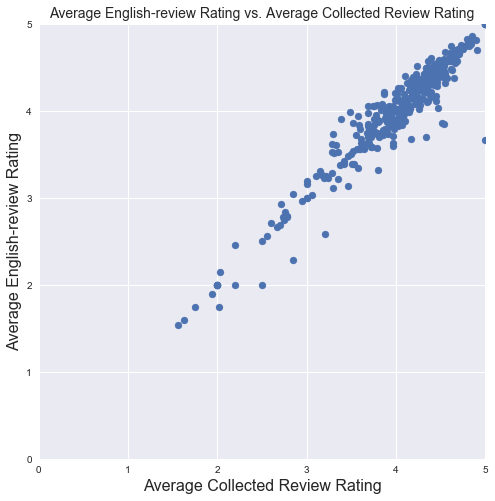

In [43]:
plt.figure(figsize = (8,8))
plt.scatter(df_hotel.avg_coll_eng_rating, df_hotel.avg_engl_rating)
plt.title("Average English-review Rating vs. Average Collected Review Rating", fontsize=14)
plt.ylabel("Average English-review Rating", fontsize=16);
plt.xlabel("Average Collected Review Rating", fontsize=16)
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

#### Stay summary (month of stay and travel type)

In [44]:
df_test.staysum.unique()

array([u'{"Stayed March 2017, traveled as a couple"}',
       u'{"Stayed March 2017, traveled with friends"}',
       u'{"Stayed March 2017, traveled with family"}',
       u'{"Stayed February 2017, traveled solo"}',
       u'{"Stayed April 2017, traveled as a couple"}',
       u'{"Stayed March 2017, traveled solo"}',
       u'{"Stayed March 2017, traveled on business"}',
       u'{"Stayed April 2017"}',
       u'{"Stayed January 2017, traveled as a couple"}',
       u'{"Stayed April 2017, traveled solo"}',
       u'{"Stayed April 2017, traveled on business"}',
       u'{"Stayed April 2017, traveled with family"}',
       u'{"Stayed February 2017, traveled with friends"}',
       u'{"Stayed April 2017, traveled with friends"}',
       u'{"Stayed November 2016, traveled solo"}',
       u'{"Stayed February 2017, traveled on business"}',
       u'{"Stayed November 2016, traveled on business"}',
       u'{"Stayed February 2017, traveled as a couple"}',
       u'{"Stayed December 2016, trav

In [45]:
#remove bad characters
df_test['staysum'] = df_test.staysum.apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [46]:
#assign first part of value to new column: month of stay
df_test['mon_of_stay'] = df_test.staysum.apply(lambda x: x.split(',')[0])

In [47]:
#remove 'Stayed ' language from column values
df_test['mon_of_stay'] = df_test.mon_of_stay.apply(lambda x: x.replace("Stayed ","") if x != '' else np.nan)

In [48]:
#convert month of stay values to datatime
df_test['mon_of_stay'] = pd.to_datetime(df_test.mon_of_stay)

In [49]:
df_test.mon_of_stay.unique()

array(['2017-03-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2015-05-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2014-11-01

In [50]:
df_test.mon_of_stay.describe()

count                   98613
unique                    158
top       2016-12-01 00:00:00
freq                     8482
first     1999-08-01 00:00:00
last      2017-04-01 00:00:00
Name: mon_of_stay, dtype: object

In [51]:
df_test.mon_of_stay.isnull().sum()

0

In [52]:
df_test['yrmon_of_stay'] = [d.strftime('%Y-%m') if not pd.isnull(d) else None for d in df_test['mon_of_stay']]

In [53]:
df_test.yrmon_of_stay.unique()

array(['2017-03', '2017-02', '2017-04', '2017-01', '2016-11', '2016-12',
       '2016-10', '2016-06', '2016-09', '2016-07', '2016-05', '2016-03',
       '2016-04', '2010-08', '2016-08', '2016-02', '2015-12', '2016-01',
       '2014-12', '2015-10', '2015-11', '2015-06', '2015-08', '2015-05',
       '2015-09', '2015-07', '2015-01', '2014-11', '2014-10', '2015-03',
       '2014-09', '2015-02', '2014-08', '2015-04', '2013-12', '2014-07',
       '2012-06', '2013-10', '2013-01', '2013-09', '2014-03', '2010-02',
       '2009-12', '2009-01', '2008-09', '2013-02', '2012-08', '2005-12',
       '2011-07', '2010-10', '2003-04', '2009-09', '2008-12', '2006-02',
       '2006-04', '2010-12', '2006-11', '2006-12', '2006-10', '2011-09',
       '2010-09', '2010-06', '2009-05', '2009-02', '2008-08', '2008-07',
       '2008-05', '2011-06', '2007-12', '2011-11', '2010-07', '2010-01',
       '2009-10', '2009-03', '2013-06', '2011-01', '2013-11', '2003-07',
       '2005-04', '2002-04', '2014-04', '2014-01', 

In [54]:
df_test.groupby('yrmon_of_stay').size().sort_index(ascending=False)[:20]

yrmon_of_stay
2017-04    1091
2017-03    8018
2017-02    7191
2017-01    6547
2016-12    8482
2016-11    6326
2016-10    6437
2016-09    5347
2016-08    4992
2016-07    4686
2016-06    4029
2016-05    3703
2016-04    3070
2016-03    2559
2016-02    1857
2016-01    1577
2015-12    2191
2015-11    1633
2015-10    1614
2015-09    1459
dtype: int64

In [55]:
monthly_stay_cts = df_test[df_test.mon_of_stay.dt.year > 2012].groupby('mon_of_stay').size()

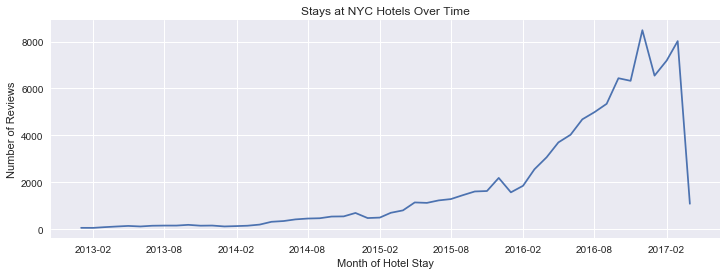

In [56]:
plt.figure(figsize = (12,4))
plt.plot(monthly_stay_cts)
plt.title("Stays at NYC Hotels Over Time")
plt.ylabel("Number of Reviews");
plt.xlabel("Month of Hotel Stay")
plt.show()

In [57]:
monthly_avg_ratings_by_hotel = pd.DataFrame(df_test[df_test.mon_of_stay.dt.year > 2013].groupby(['name','mon_of_stay'])['stars'].mean()).reset_index()

In [58]:
monthly_avg_ratings_by_hotel.head()

,name,mon_of_stay,stars
0,1 Hotel Central Park,2015-11-01,4.00
1,1 Hotel Central Park,2016-01-01,3.00
2,1 Hotel Central Park,2016-02-01,4.00
3,1 Hotel Central Park,2016-03-01,4.25
4,1 Hotel Central Park,2016-04-01,5.00


In [59]:
monthly_avg_ratings_by_hotel.shape

(9058, 3)

In [60]:
months_w_review_cts = monthly_avg_ratings_by_hotel.groupby('name').size().sort_values(ascending=False).rename("months_w_rating").reset_index()
hotels_w_many_reviews = months_w_review_cts[months_w_review_cts.months_w_rating >= 35]

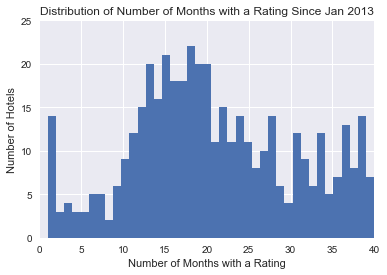

In [61]:
#since 2013, plot counts of hotels by bin of number of months with a rating
months_w_review_cts.months_w_rating.hist(bins=40)
plt.title("Distribution of Number of Months with a Rating Since Jan 2013")
plt.ylabel("Number of Hotels");
plt.xlabel("Number of Months with a Rating")
plt.xlim(0,40)
plt.ylim(0,25)
plt.show()

In [62]:
hotels_w_many_reviews.head()

,name,months_w_rating
0,Comfort Inn Manhattan Bridge,40
1,Chambers Hotel,40
2,The Hotel 91,40
3,AKA Times Square,40
4,Heritage Hotel New York City,40


In [63]:
hotels_w_many_reviews.shape

(54, 2)

In [64]:
hotel_list = hotels_w_many_reviews.name.unique().tolist()
hotel_list

[u'Comfort Inn Manhattan Bridge',
 u'Chambers Hotel',
 u'The Hotel 91',
 u'AKA Times Square',
 u'Heritage Hotel New York City',
 u'Courtyard New York Manhattan/SoHo',
 u'The Maritime Hotel',
 u'Fairfield Inn & Suites New York Manhattan/Downtown East',
 u'Crosby Street Hotel',
 u'Hotel East Houston',
 u'The Wall Street Inn',
 u'Kitano New York',
 u'Carvi Hotel New York',
 u'Dylan Hotel NYC',
 u'Hotel Mulberry',
 u'Duane Street Hotel',
 u'The Mark',
 u'Blue Moon Hotel',
 u'Fairfield Inn & Suites New York Manhattan/Fifth Avenue',
 u'The Bowery Hotel',
 u'Holiday Inn Express New York City-Wall Street',
 u'AKA Central Park',
 u'Solita Soho Hotel',
 u'Hotel Americano',
 u'Greenwich Hotel',
 u'Hotel Plaza Athenee New York',
 u'Hotel 373 Fifth Avenue',
 u'Holiday Inn New York City - Wall Street',
 u'The Nolitan Hotel',
 u'Riverside Tower Hotel',
 u'Manhattan Broadway Hotel',
 u'The Lombardy Hotel',
 u'The Sherry-Netherland Hotel',
 u'Lowell Hotel',
 u'Royal Park Hotel',
 u'Aloft Harlem',
 u'Eu

In [65]:
df_hotel.shape

(446, 104)

In [66]:
df_hotel_subset = df_hotel[df_hotel['name'].isin(hotel_list)][['name','rank_num']]

In [67]:
df_hotel_subset.head()

,name,rank_num
3,The Mark,24.0
17,Chambers Hotel,120.0
21,Da Vinci Hotel,357.0
28,Hotel Mulberry,179.0
36,Courtyard New York Manhattan/SoHo,238.0


In [68]:
df_hotel_subset.to_csv('hotels_for_trends.csv')

In [69]:
monthly_avg_ratings_by_hotel.loc[monthly_avg_ratings_by_hotel.name == 'Americana Inn'][['mon_of_stay','stars']]

,mon_of_stay,stars
299,2014-01-01,3.000000
300,2014-02-01,5.000000
301,2014-03-01,4.000000
302,2014-04-01,4.000000
303,2014-05-01,3.000000
304,2014-06-01,2.000000
305,2014-08-01,3.833333
306,2014-09-01,3.333333
307,2014-10-01,2.666667
308,2014-11-01,3.000000


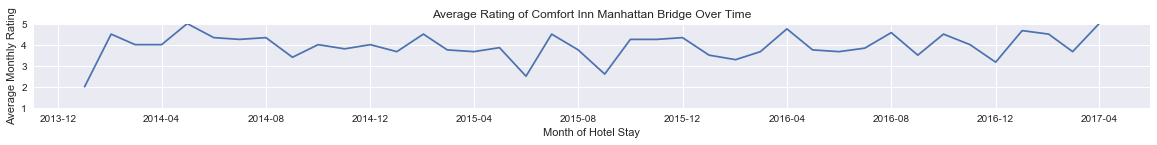

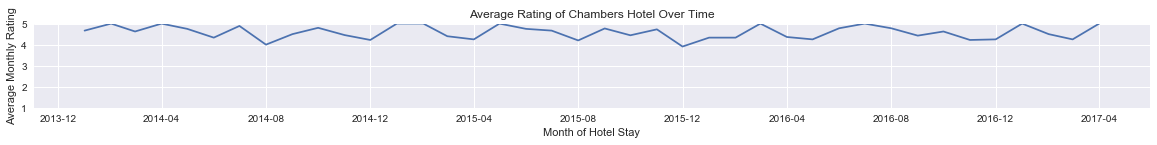

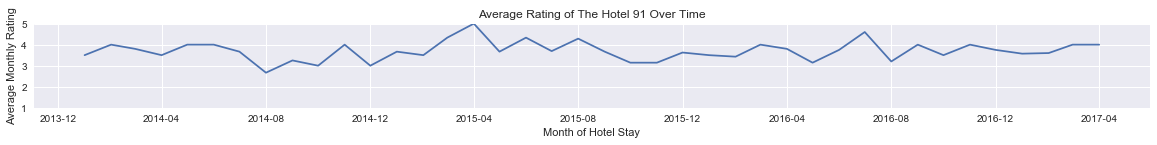

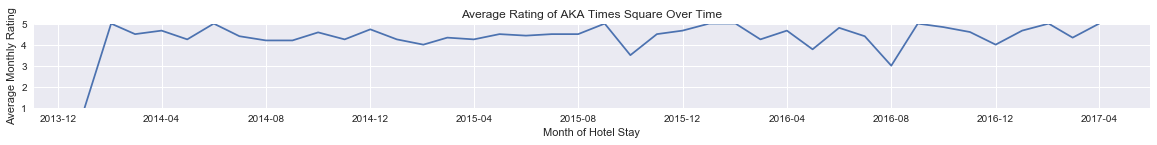

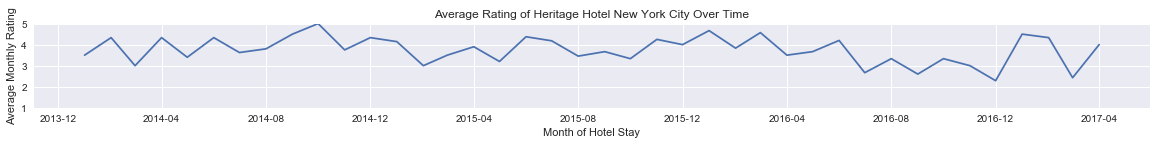

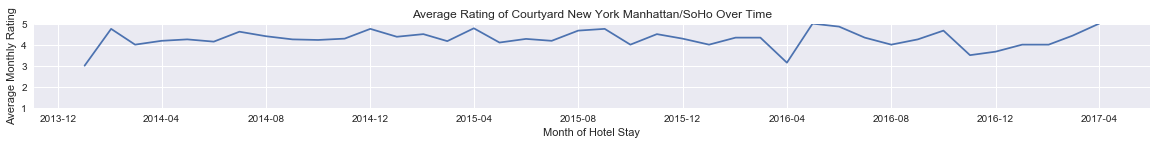

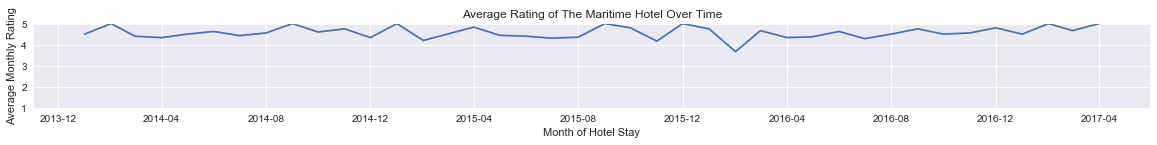

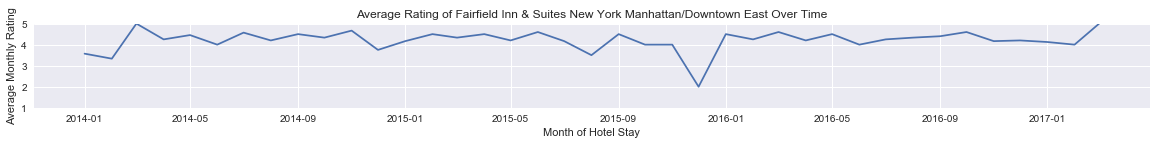

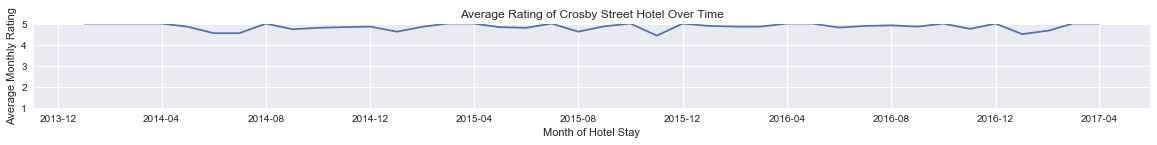

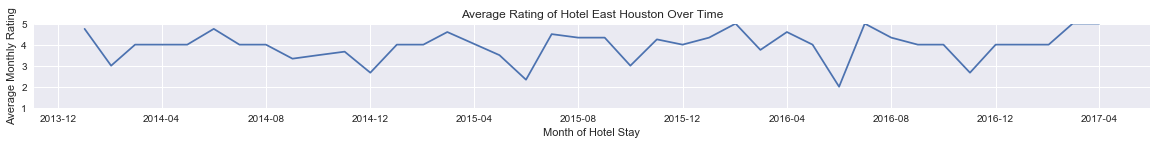

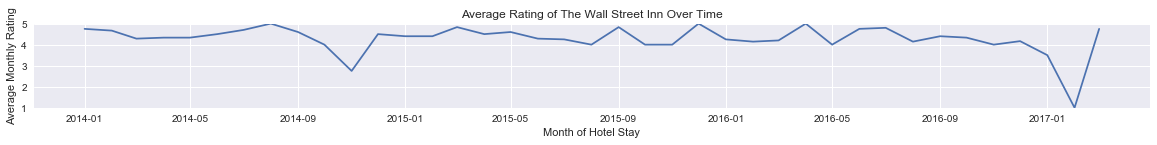

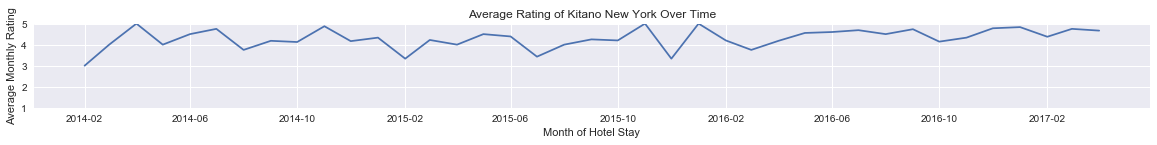

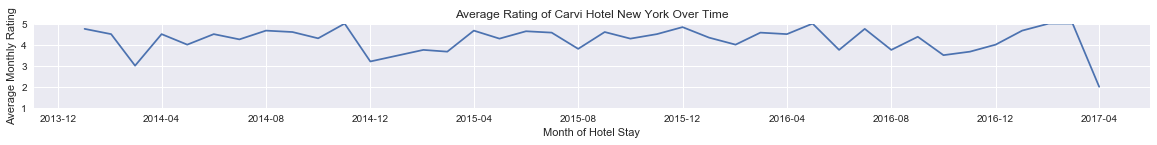

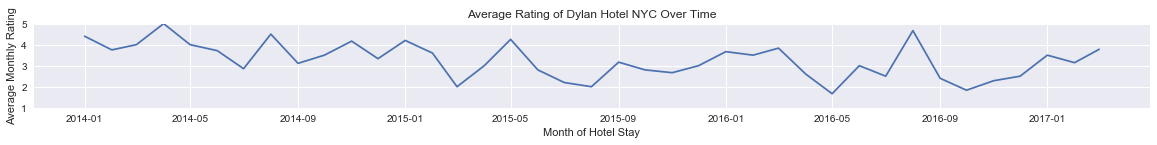

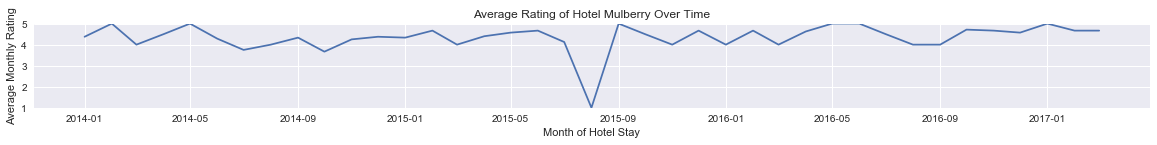

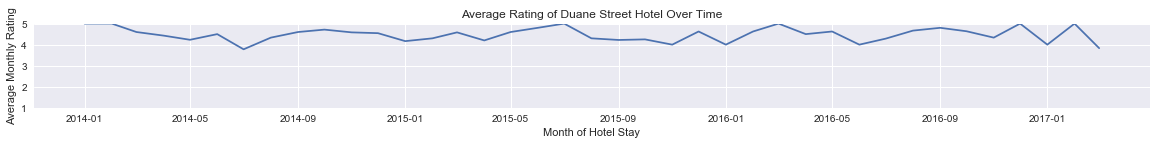

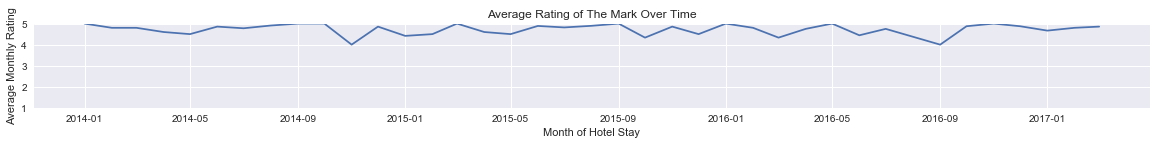

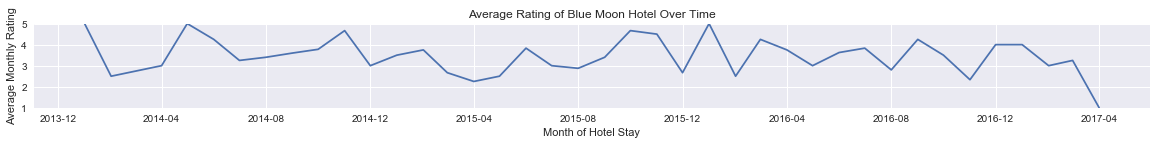

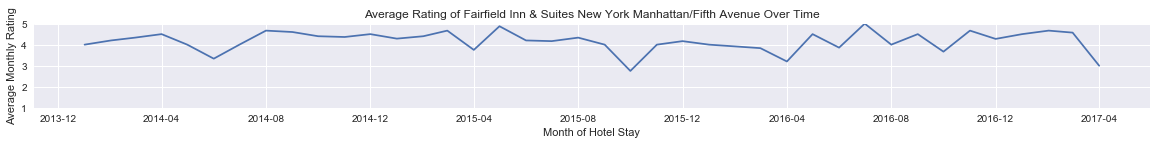

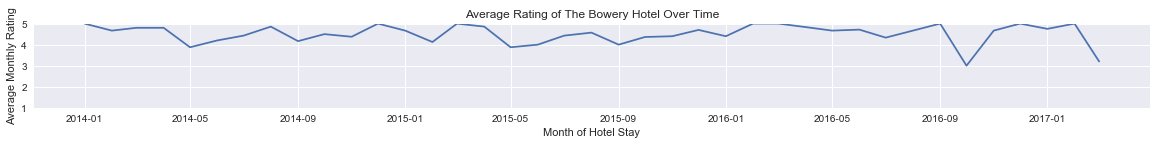

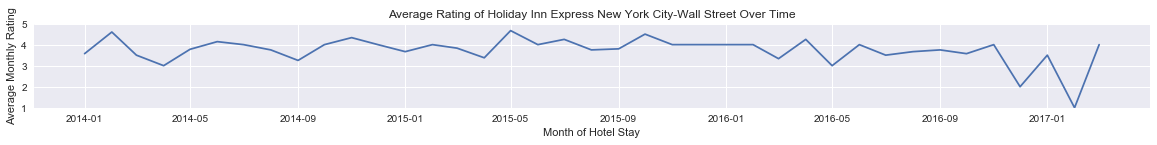

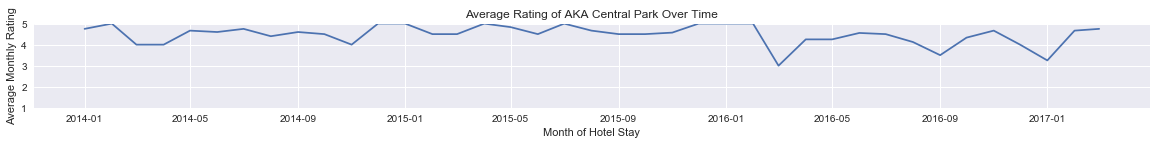

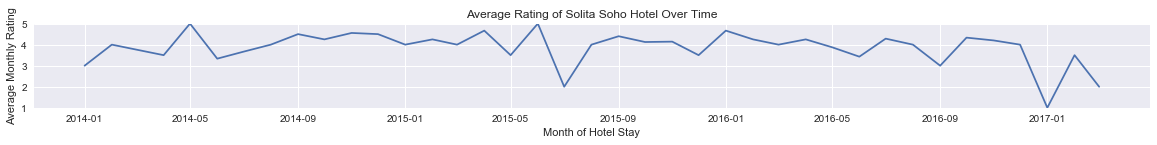

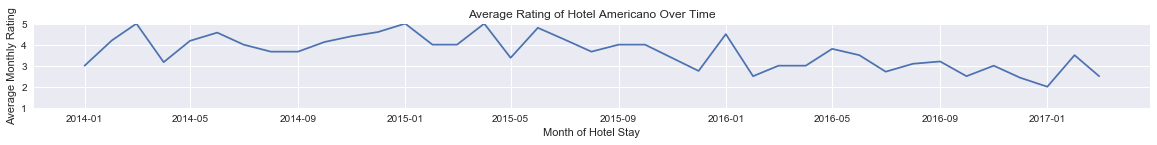

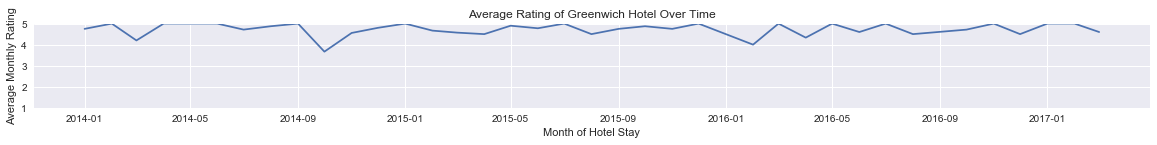

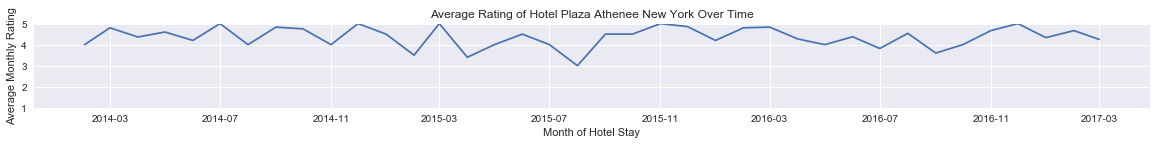

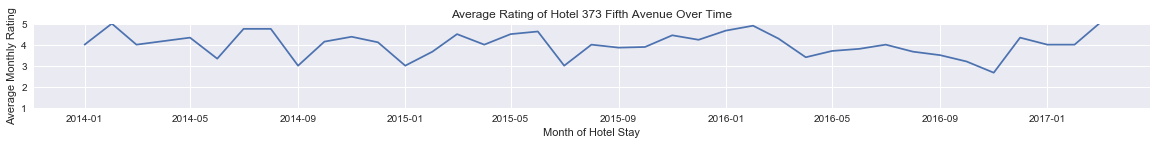

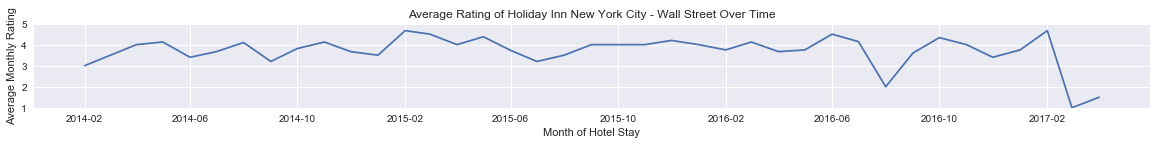

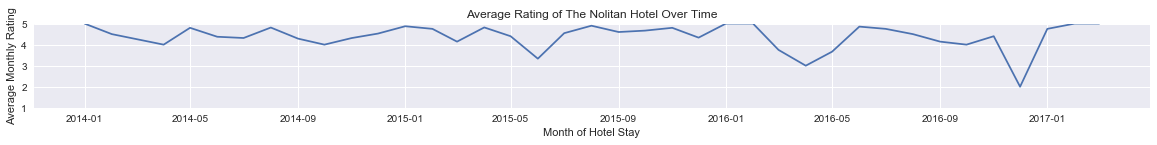

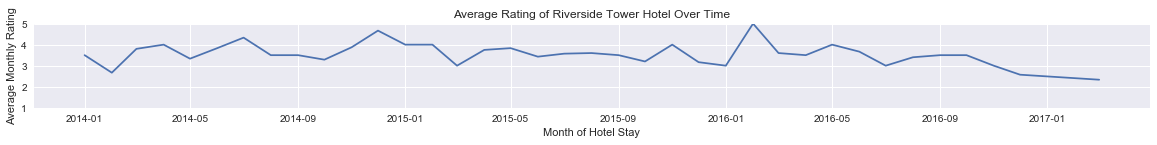

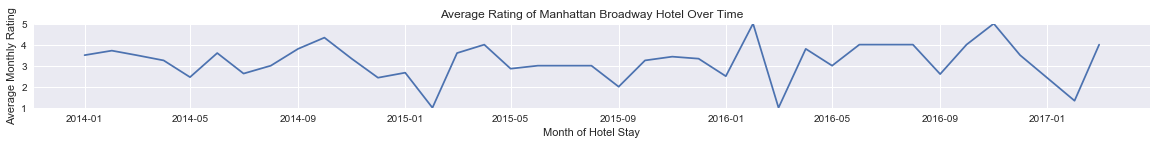

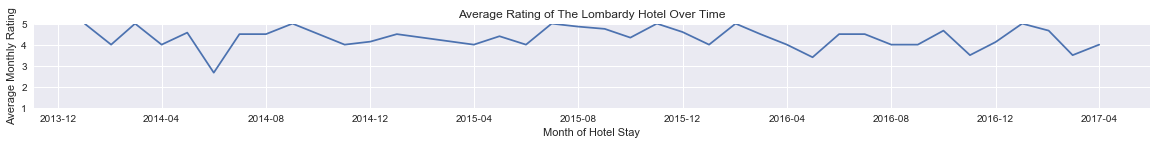

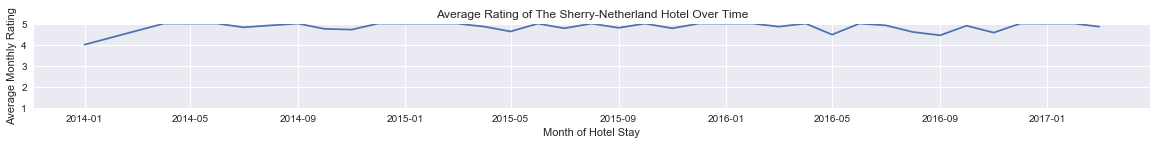

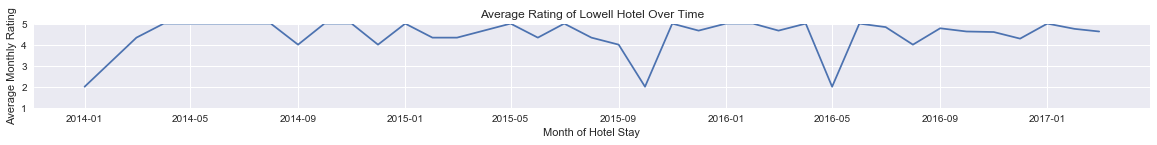

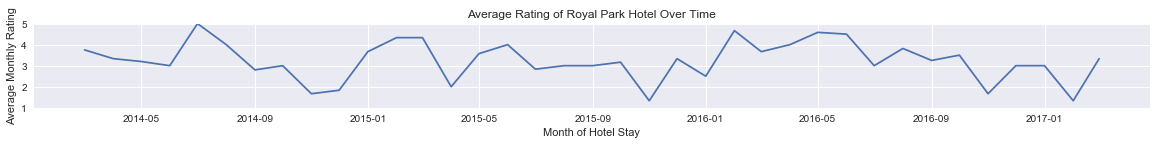

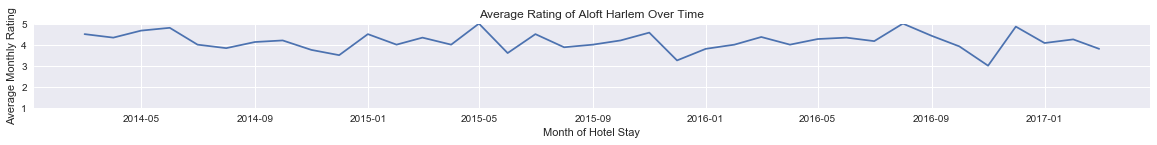

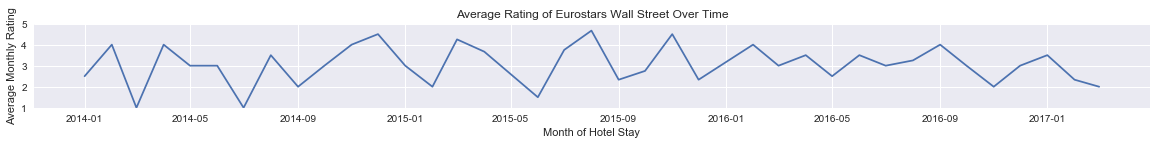

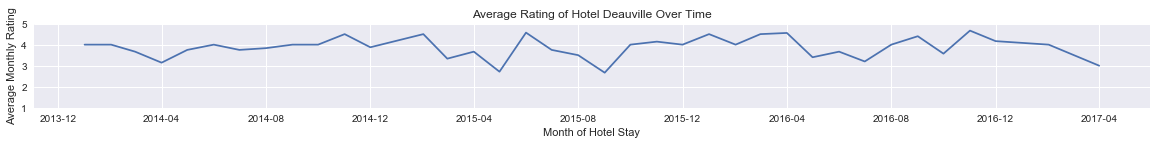

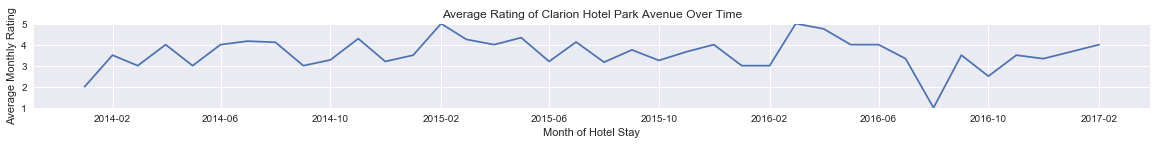

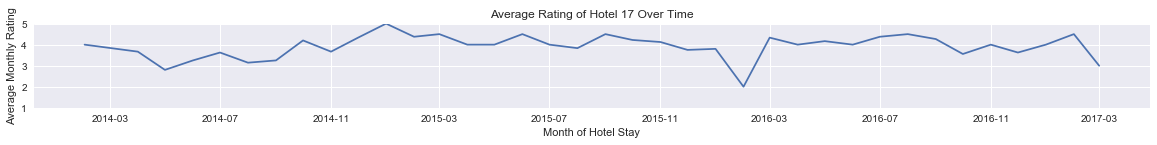

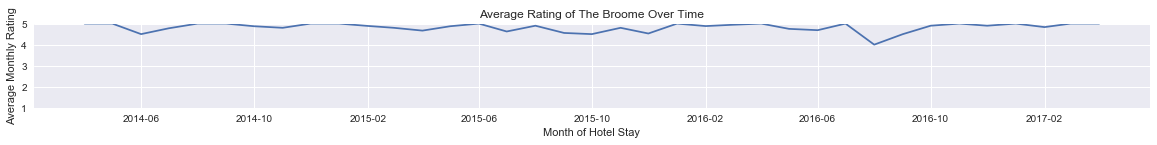

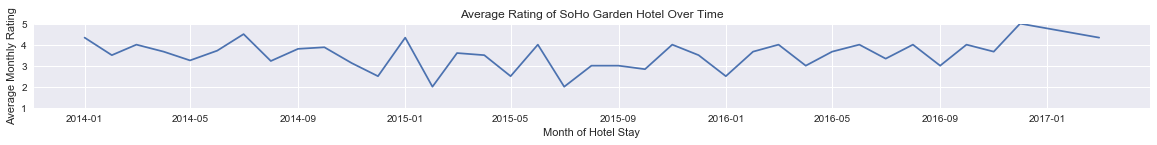

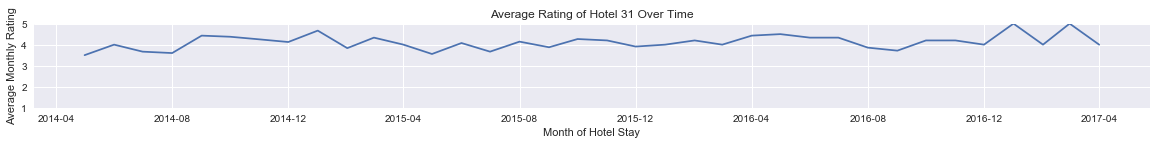

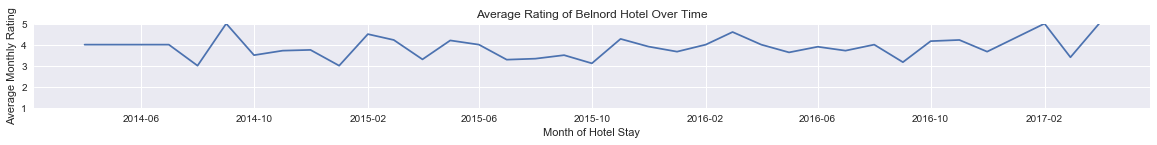

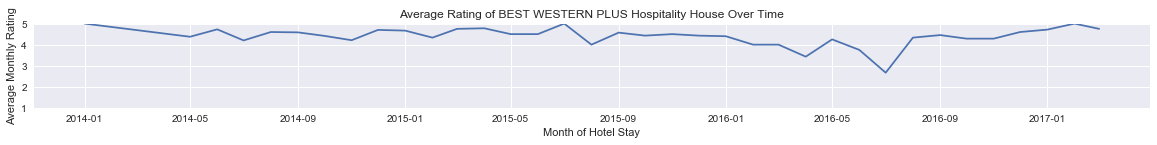

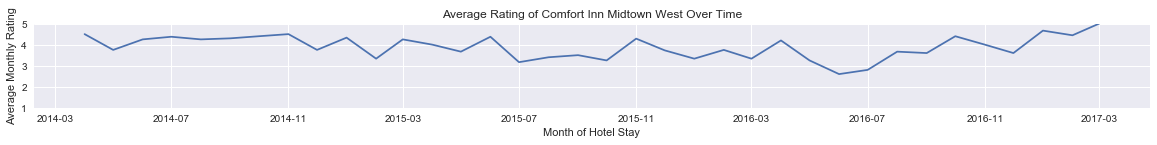

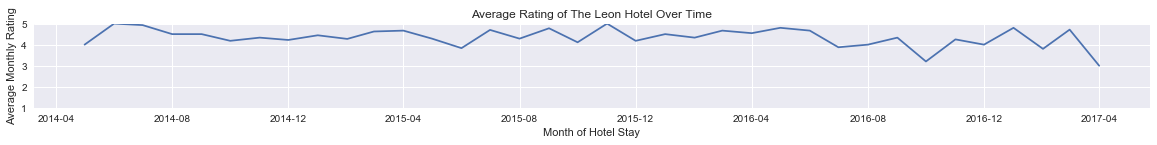

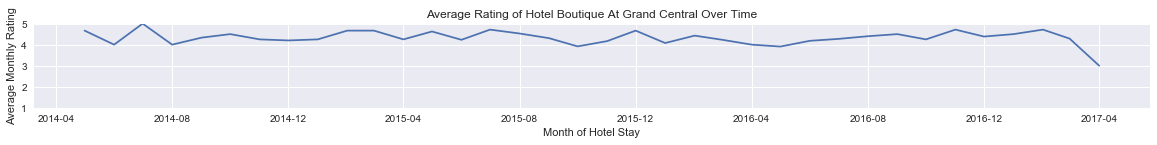

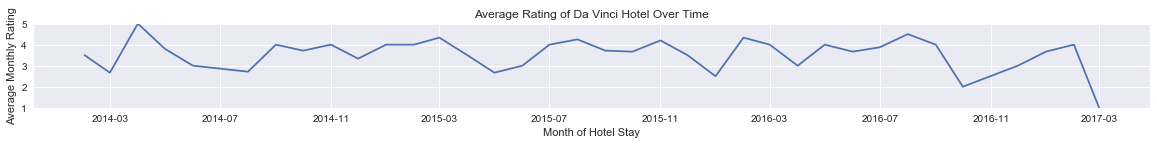

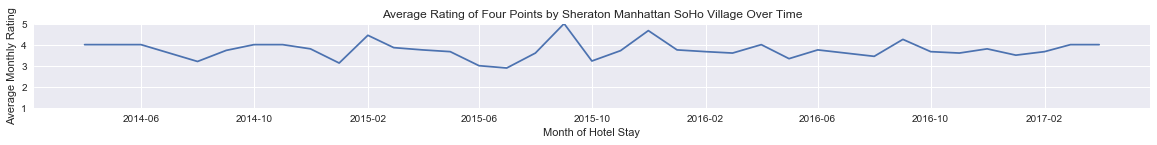

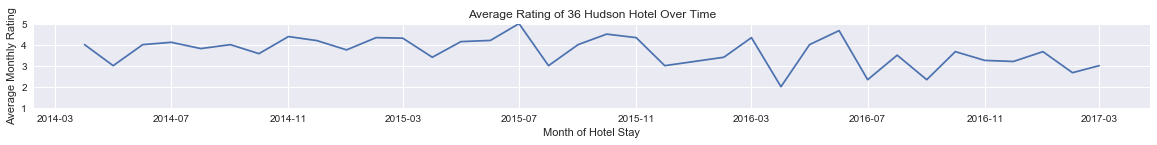

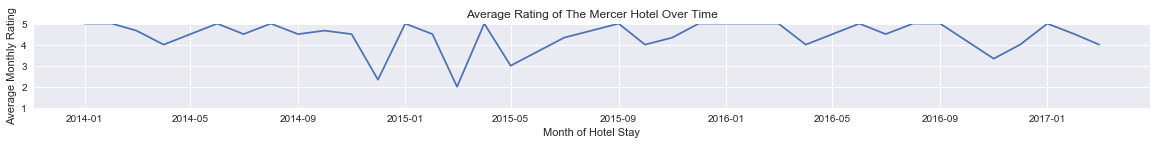

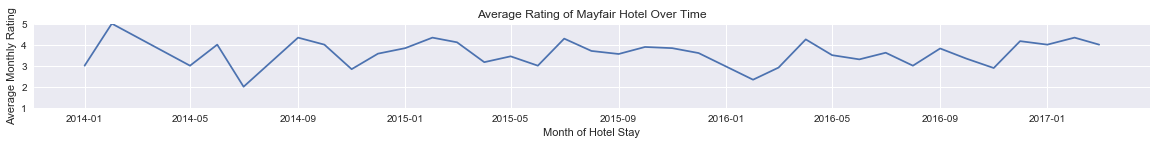

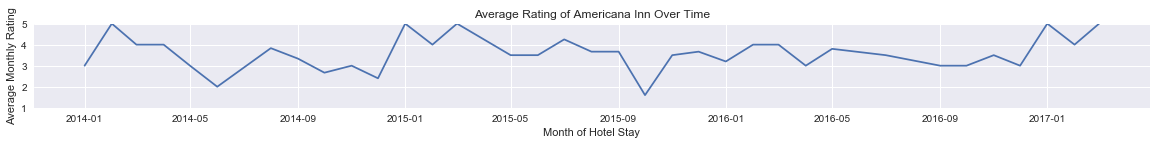

In [70]:
#hotel_list is a list of hotels I'm interested in
n_plots = len(hotel_list)
for idx, hotel in enumerate(hotel_list):
    #monthly_avg_ratings_by_hotel is a DF prepared earlier with hotel name, month, and average rating for that month columns
    #hotel_df is a subset of that DF with all months for one hotel
    hotel_df = monthly_avg_ratings_by_hotel.loc[monthly_avg_ratings_by_hotel.name == hotel][['mon_of_stay','stars']]
    #large figsize to cover all plots (54 in my case)
    plt.figure(figsize = (20,100))
    #create subplot for individual hotel
    plt.subplot(n_plots,1,idx+1)
    #plot average rating (stars) by month
    plt.plot(hotel_df.mon_of_stay, hotel_df.stars)
    plt.title("Average Rating of {} Over Time".format(hotel))
    plt.ylabel("Average Monthly Rating")
    plt.xlabel("Month of Hotel Stay")
    plt.ylim(1,5)
    plt.yticks(np.arange(1, 6, 1.0))
    plt.show()

In [71]:
#assign second part of staysum value to new column (travel_type), accounting for cases when info is unavailable
df_test['travel_type'] = df_test.staysum.apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else "unknown")

In [72]:
#extract and keep just the relevant part of the string
df_test['travel_type'] = df_test.travel_type.apply(lambda x: x.split( )[-1] if x != None else None)

In [73]:
df_test.travel_type.unique()

array([u'couple', u'friends', u'family', u'solo', u'business', 'unknown'], dtype=object)

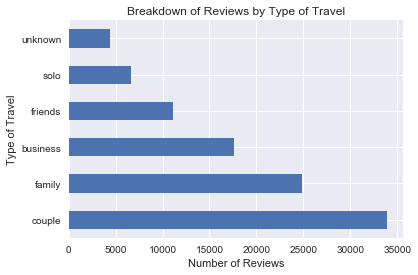

In [74]:
df_test.travel_type.value_counts(dropna=False).plot(kind="barh")
plt.title("Breakdown of Reviews by Type of Travel")
plt.ylabel("Type of Travel");
plt.xlabel("Number of Reviews")
plt.show()
#palette="RdBu"

In [75]:
one_star_df = pd.DataFrame(df_test[df_test.stars == 1].groupby('travel_type')['stars'].sum().rename("one_star_ct"))
two_star_df = pd.DataFrame(df_test[df_test.stars == 2].groupby('travel_type')['stars'].sum().rename("two_star_ct"))
three_star_df = pd.DataFrame(df_test[df_test.stars == 3].groupby('travel_type')['stars'].sum().rename("three_star_ct"))
four_star_df = pd.DataFrame(df_test[df_test.stars == 4].groupby('travel_type')['stars'].sum().rename("four_star_ct"))
five_star_df = pd.DataFrame(df_test[df_test.stars == 5].groupby('travel_type')['stars'].sum().rename("five_star_ct"))

In [76]:
review_cts_by_type_and_star = pd.concat([one_star_df,two_star_df,three_star_df,four_star_df,five_star_df],axis=1)

In [77]:
review_cts_by_type_and_star

,one_star_ct,two_star_ct,three_star_ct,four_star_ct,five_star_ct
travel_type,,,,,
business,952.0,2162.0,7122.0,20216.0,40865.0
couple,1064.0,2586.0,10752.0,40244.0,89695.0
family,861.0,1844.0,7404.0,29132.0,66480.0
friends,498.0,902.0,3414.0,13104.0,28625.0
solo,346.0,614.0,2364.0,8408.0,15645.0
unknown,286.0,452.0,1728.0,5376.0,10080.0


In [78]:
total = np.sum(review_cts_by_type_and_star.ix['business','one_star_ct':].values)

In [79]:
review_cts_by_type_and_star['total'] = review_cts_by_type_and_star.sum(axis=1)

In [80]:
stars_list = ['one','two','three','four','five']
for star in stars_list:
    review_cts_by_type_and_star['{}_star_pct'.format(star)] = review_cts_by_type_and_star['{}_star_ct'.format(star)] / review_cts_by_type_and_star.total

In [81]:
review_cts_by_type_and_star.reset_index(inplace=True)

In [82]:
review_cts_by_type_and_star

,travel_type,one_star_ct,two_star_ct,three_star_ct,four_star_ct,five_star_ct,total,one_star_pct,two_star_pct,three_star_pct,four_star_pct,five_star_pct
0,business,952.0,2162.0,7122.0,20216.0,40865.0,71317.0,0.013349,0.030315,0.099864,0.283467,0.573005
1,couple,1064.0,2586.0,10752.0,40244.0,89695.0,144341.0,0.007371,0.017916,0.074490,0.278812,0.621410
2,family,861.0,1844.0,7404.0,29132.0,66480.0,105721.0,0.008144,0.017442,0.070033,0.275555,0.628825
3,friends,498.0,902.0,3414.0,13104.0,28625.0,46543.0,0.010700,0.019380,0.073352,0.281546,0.615023
4,solo,346.0,614.0,2364.0,8408.0,15645.0,27377.0,0.012638,0.022428,0.086350,0.307119,0.571465
5,unknown,286.0,452.0,1728.0,5376.0,10080.0,17922.0,0.015958,0.025220,0.096418,0.299967,0.562437


(0.25750000000000006, 6.7575)

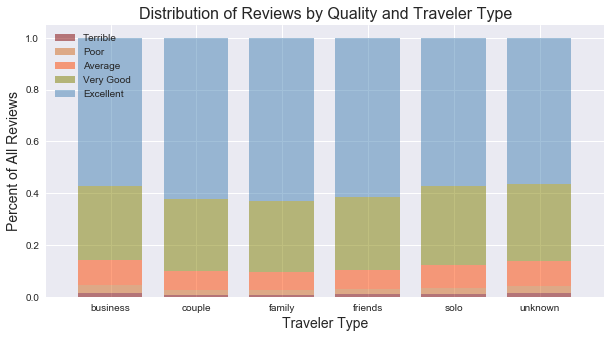

In [83]:
# Create the general blog and the "subplots" i.e. the bars
f, ax1 = plt.subplots(1, figsize=(10,5))

# Set the bar width
bar_width = 0.75

# positions of the left bar-boundaries
bar_l = [i+1 for i in range(len(review_cts_by_type_and_star['travel_type']))]

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/100) for i in bar_l]

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the business data
        review_cts_by_type_and_star['one_star_pct'],
        # set the width
        width=bar_width,
        # with the label pre score
        label='Terrible',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='maroon')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the couple data
        review_cts_by_type_and_star['two_star_pct'],
        # set the width
        width=bar_width,
        # with pre_score on the bottom
        bottom=review_cts_by_type_and_star['one_star_pct'],
        # with the label mid score
        label='Poor',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='chocolate')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        review_cts_by_type_and_star['three_star_pct'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j for i,j in zip(review_cts_by_type_and_star['one_star_pct'],review_cts_by_type_and_star['two_star_pct'])],
        # with the label post score
        label='Average',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='orangered')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        review_cts_by_type_and_star['four_star_pct'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k for i,j,k in zip(review_cts_by_type_and_star['one_star_pct'],review_cts_by_type_and_star['two_star_pct'],review_cts_by_type_and_star['three_star_pct'])],
        # with the label post score
        label='Very Good',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='olive')

# Create a bar plot, in position bar_1
ax1.bar(bar_l,
        # using the post_score data
        review_cts_by_type_and_star['five_star_pct'],
        # set the width
        width=bar_width,
        # with pre_score and mid_score on the bottom
        bottom=[i+j+k+l for i,j,k,l in zip(review_cts_by_type_and_star['one_star_pct'],review_cts_by_type_and_star['two_star_pct'],review_cts_by_type_and_star['three_star_pct'],review_cts_by_type_and_star['four_star_pct'])],
        # with the label post score
        label='Excellent',
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='steelblue')

# set the x ticks with names
plt.xticks(tick_pos, review_cts_by_type_and_star['travel_type'])

# Set the label and legends
ax1.set_ylabel("Percent of All Reviews", fontsize=14)
ax1.set_xlabel("Traveler Type", fontsize=14)
plt.legend(loc='upper left')

plt.title("Distribution of Reviews by Quality and Traveler Type", fontsize=16)

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

#### Body of review text

In [84]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
#replace line breaks with spaces
df_test['content'] = df_test.content.apply(lambda x: x.replace("\n"," "))

In [87]:
#remove all punctuation and change all words to lowercase
df_test['content'] = df_test.content.apply(lambda x: ''.join(c.lower() for c in x if c not in string.punctuation))

In [88]:
#remove double back slashes
#df_test['content'] = df_test.content.apply(lambda x: x.replace("\\",""))

In [89]:
df_test.content.head()

0     this being an anniversarywe decided to visit ...
1     forget the hotels in times square this one ou...
2     the friendly service we received from every m...
3     a fantastic midtown location decent rates cle...
4     the iroquois is our favorite we had wonderful...
Name: content, dtype: object

In [90]:
df_temp = df_test.loc[df_test['content'].str.contains('\'')]

In [91]:
df_temp.content.values

array([], dtype=object)

#### Reviewer location

In [92]:
df_test.reviewer_loc.unique()

array([u'{"\nBridgetown, Barbados\n"}', u'{"\nHouston, Texas\n"}',
       u'{"\nSolana Beach, California\n"}', ..., u'{"\nDana Point\n"}',
       u'{"\nKingsbridge, Devon\n"}', u'{"\nBaildon, England\n"}'], dtype=object)

In [93]:
df_test['reviewer_loc'] = df_test.reviewer_loc.apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [94]:
df_test['reviewer_loc'] = df_test.reviewer_loc.apply(lambda x: x.replace("\n",""))

In [95]:
df_test.reviewer_loc.unique()

array([u'Bridgetown, Barbados', u'Houston, Texas',
       u'Solana Beach, California', ..., u'Dana Point',
       u'Kingsbridge, Devon', u'Baildon, England'], dtype=object)

In [96]:
df_test.loc[df_test['reviewer_loc'] == ''].shape

(17725, 11)

#### Save cleaned reviews dataframe to pickle file

In [97]:
df_test.to_pickle('reviews.pickle')